In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from functionsMaths import calculateDelta, get_mse,gradiente_descendente, feedforward, div_tuplas, init_params_test
import os
import math
from statistics import mean

In [55]:
#Cantidad de letras por cada set
cantidad =['100','500','1000']

#Porcentajes datos de validacion
set_validation = [0.1,0.2,0.3]

#Cantidad de epocas
epocas = 30

#Pruebas solicitadas
#1er elemento corresponde a cantidad de neuronas por capas
    #[5] = 5 neuronas con 1 capa oculta 
    #[5,5] = 5 neuronas con 2 capas ocultas
#2do porcentaje de aprendizaje
#3ro porcentaje de momento
test =[ [[5],0.5,0.5], [[10],0.5,0.5], [[5,5],0.5,0.5], [[10,10],0.5,0.5]]

In [141]:
rows = []
for nro in range(len(test)):
    #architecture
    W,B = init_params_test(test[nro][0])
    lr = np.array(test[nro][1])
    m = np.array(test[nro][2])
    Y = []
    for set in range (len(cantidad)):
        for percentage in range(len(set_validation)):
        
            data = (pd.read_csv(os.path.join(os.path.abspath(''),"data","distorsionadas",cantidad[set],'letras.csv'),sep=';',header=None)).to_numpy()
            #Convertimos el dataframe en array numpy
            data_train = data[:int(len(data)-int(len(data)*set_validation[percentage])*2)]
            data_validation = data[int(len(data)-int(len(data)*set_validation[percentage])*2):int(len(data)-int(len(data)*set_validation[percentage])*2)+int(len(data)*set_validation[percentage])]
            data_test = data[int(len(data)-int(len(data)*set_validation[percentage])*2)+int(len(data)*set_validation[percentage]):]

            #Division de datos en tuplas(datos,clase)
            letras_train = div_tuplas(data_train)
            letras_test = div_tuplas(data_train)
            letras_validation = div_tuplas(data_validation)


            #Comienzo de Perceptron
            err_train_epoc = 0
            err_valid_epoc = 0

            for epoc in range(epocas):
                err_training = np.array([0,0,0])
                err_validation = np.array([0,0,0])

                #TRAINING
                for i in range(len(letras_train)):
        
                    Y = feedforward(letras_train[i][0],W,B,len(test[nro][0])+2)
                    Ye = np.array(letras_train[i][1])
                    err_training = err_training + ((Ye-Y[-1])**2)

                    #Deltas
                    deltas = calculateDelta(Y[-1],Ye,W[1:])

                    W,B = gradiente_descendente(W,B,deltas,Y[0:len(Y)-1],lr,m)

                #VALIDATION
                for i in range(len(letras_validation)):
                    Y = feedforward(letras_validation[i][0],W,B,len(test[nro][0])+2)
                    Ye = np.array(letras_validation[i][1])
                    err_validation = err_validation + ((Ye-Y[-1])**2)

                err_train_epoc = get_mse(np.mean(err_training),len(letras_train))
                err_valid_epoc = get_mse(np.mean(err_validation),len(letras_validation))
                rows.append([len(test[nro][0]),test[nro][0][0],epoc,cantidad[set],set_validation[percentage]*100,err_train_epoc*100,err_valid_epoc*100])
        
    
     

In [142]:
tabla = pd.DataFrame(rows,columns=['count layer hidden','count neuron','epoc','count data','percentage validation','percentage error training','percentage error validation'])
tabla.to_csv('pruebas_epoc30.csv', encoding='utf-8', index=False)

In [143]:
df = (pd.read_csv(os.path.join(os.path.abspath(''),'pruebas_epoc30.csv'),delimiter=',',header=0))
df = pd.DataFrame(df)

In [144]:
df.head()

,count layer hidden,count neuron,epoc,count data,percentage validation,percentage error training,percentage error validation
0,1,5,0,100,10.0,16.450443,10.315810
1,1,5,1,100,10.0,10.418801,8.456201
2,1,5,2,100,10.0,7.997782,5.960255
3,1,5,3,100,10.0,5.545180,4.038485
4,1,5,4,100,10.0,3.336758,2.340362


In [171]:
#tabla = pd.DataFrame(rows,columns=['count layer hidden','count neuron','epoc','count data','percentage validation','percentage error training','percetage error validation'])
#tabla.groupby(by=["percentage validation"])['percentage error training'].mean()
filt = df[(df['count layer hidden']==2) & (df['count neuron']==5) & (df['percentage validation']==10) & (df['count data']==1000)]
#df.dtypes['count data']
#error_train_epoc = filt['percentage error training']
#error_valid_epoc = filt['percentage error validation']

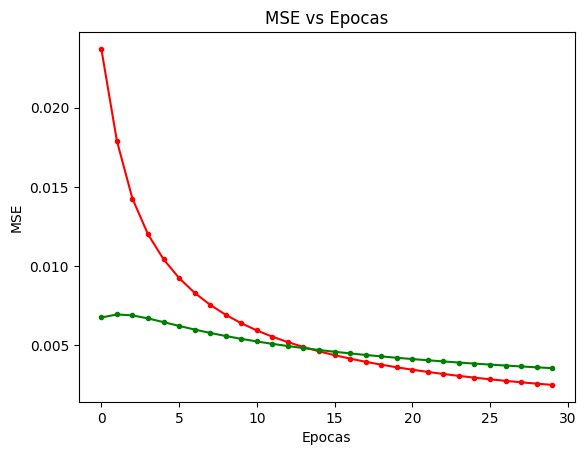

In [172]:
x = np.array([i for i in range(epocas)])
plt.plot(x,filt['percentage error training'], linestyle='-', marker='.', color = 'r')
plt.plot(x,filt['percentage error validation'],linestyle='-', marker='.', color = 'g')
plt.title('MSE vs Epocas')
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.show()